In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales -.csv


In [2]:
df = pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales -.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
print("\n Estatísticas:")
print(df.describe())


 Estatísticas:
        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00 

# Analise das frequências no dataset

In [7]:
# Estou usando essa linha para não precisar específicar a grid posteriormente
sns.set_style("whitegrid")

# Branch

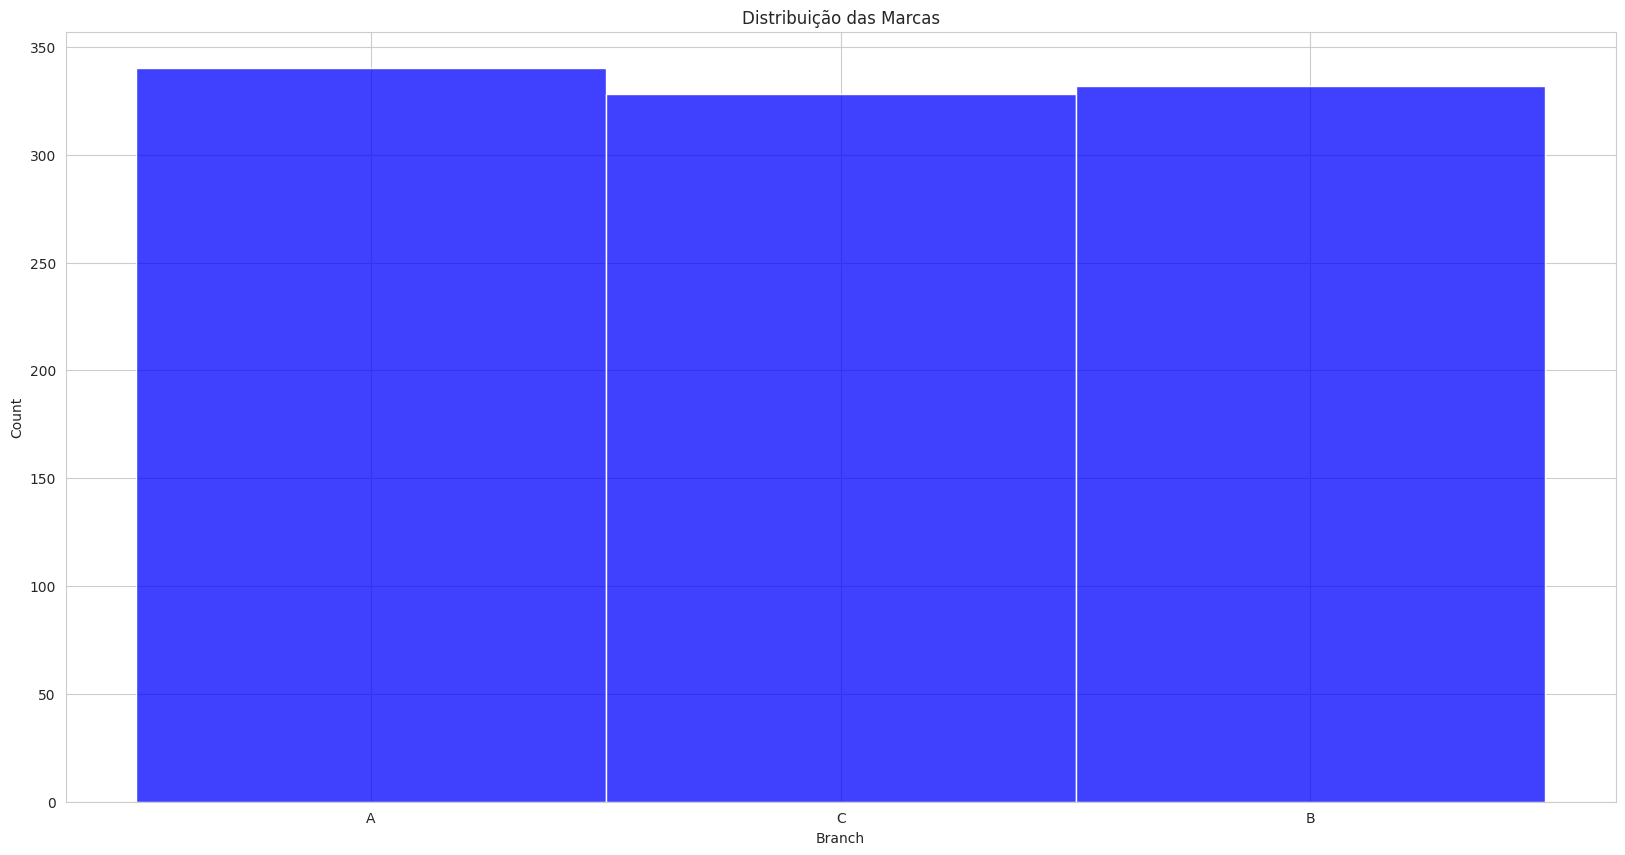

In [8]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Branch'], bins=30, kde=False, color='blue')
plt.title('Distribuição das Marcas')
plt.show()

In [9]:
qtd = df['Branch'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Branch', 'Frequencia']
qtd

,Branch,Frequencia
0,A,340
1,B,332
2,C,328


# City

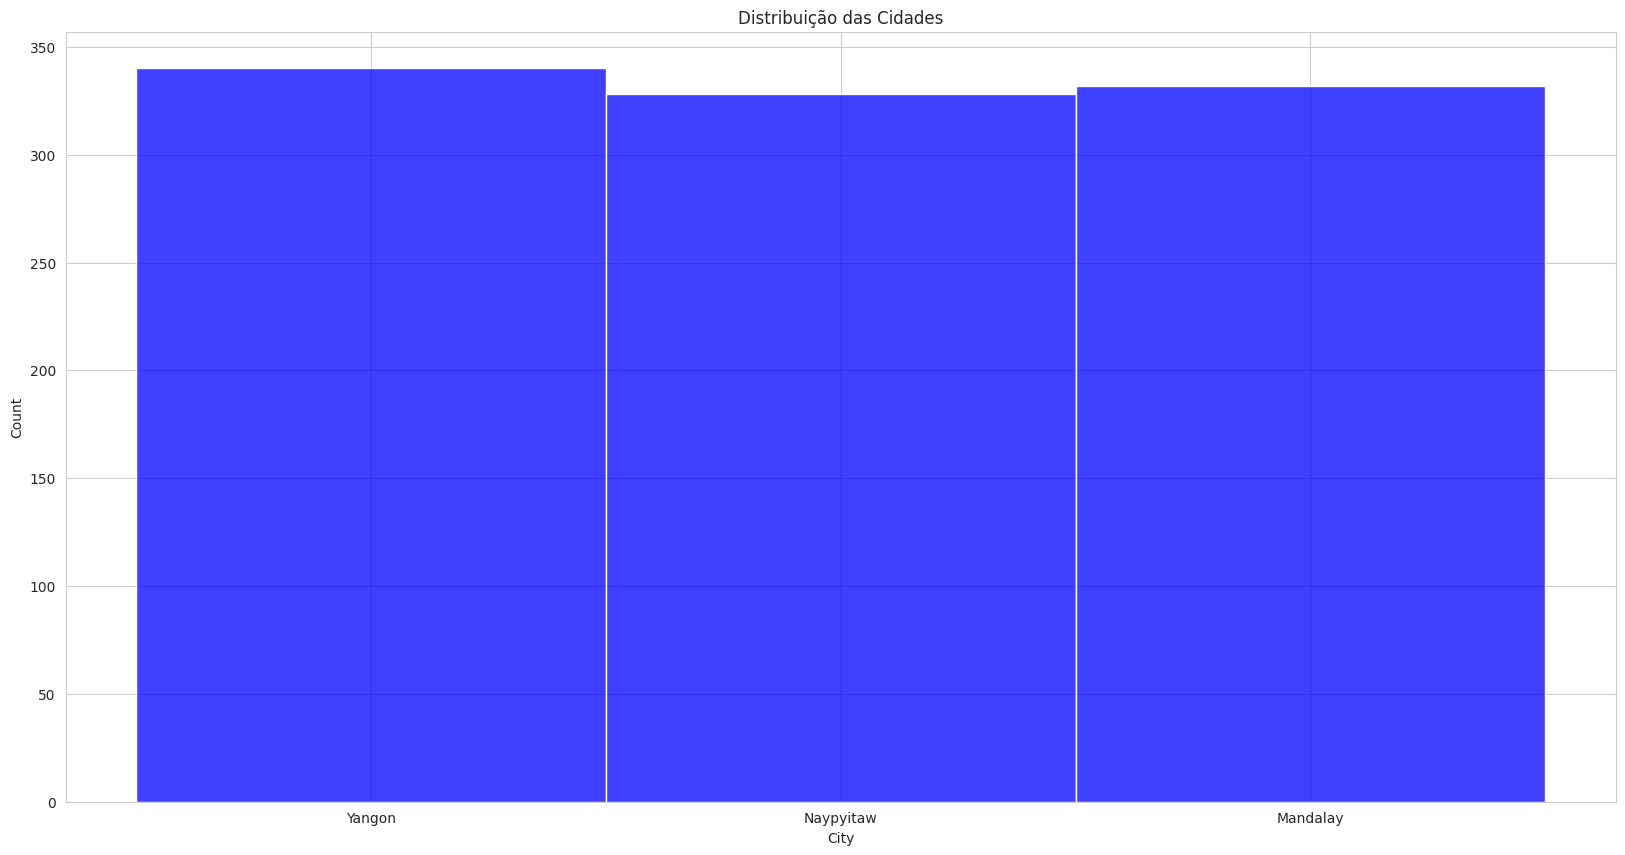

In [10]:
plt.figure(figsize=(20, 10))
sns.histplot(df['City'], bins=30, kde=False, color='blue')
plt.title('Distribuição das Cidades')
plt.show()

In [11]:
qtd = df['City'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['City', 'Frequencia']
qtd

,City,Frequencia
0,Yangon,340
1,Mandalay,332
2,Naypyitaw,328


# Customer type

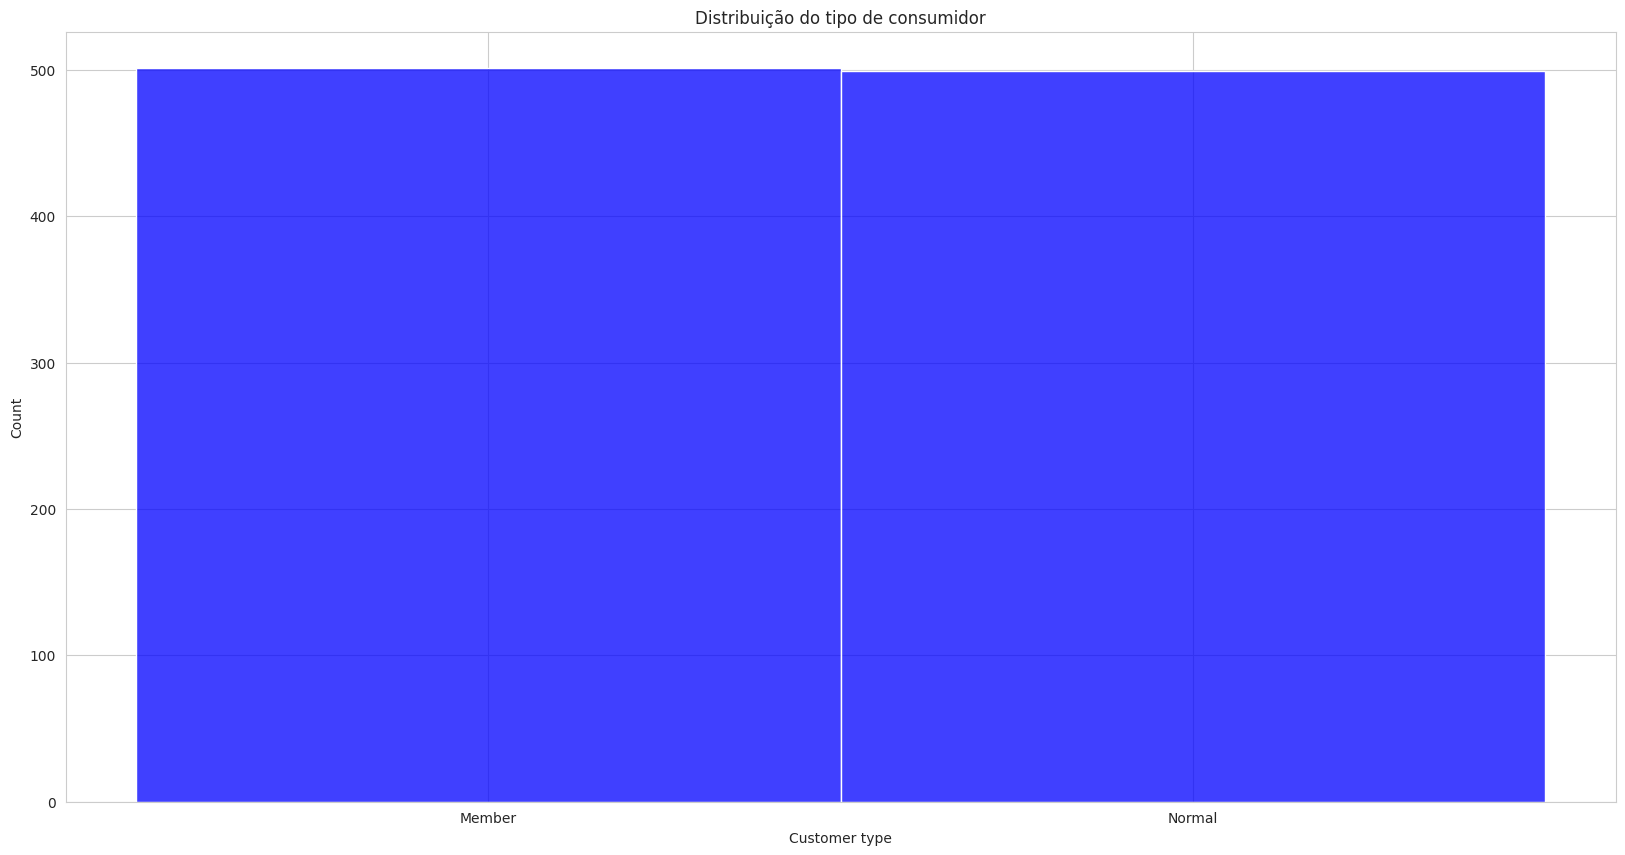

In [12]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Customer type'], bins=30, kde=False, color='blue')
plt.title('Distribuição do tipo de consumidor')
plt.show()

In [13]:
qtd = df['Customer type'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Customer type', 'Frequencia']
qtd

,Customer type,Frequencia
0,Member,501
1,Normal,499


# Gender

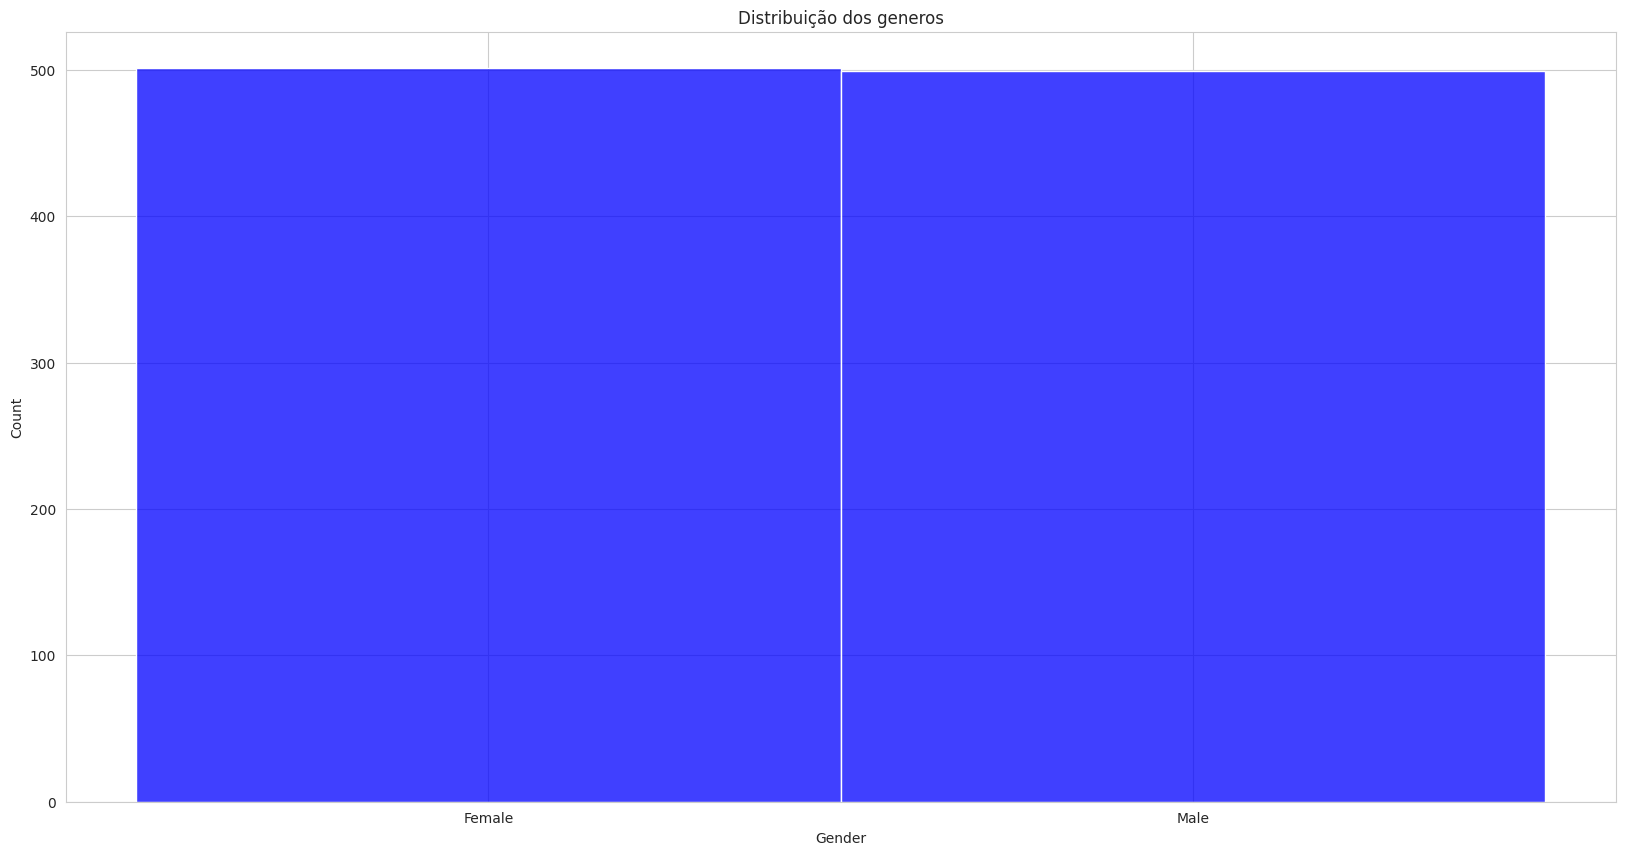

In [14]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Gender'], bins=30, kde=False, color='blue')
plt.title('Distribuição dos generos')
plt.show()

In [15]:
qtd = df['Gender'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Gender', 'Frequencia']
qtd

,Gender,Frequencia
0,Female,501
1,Male,499


# Product line 

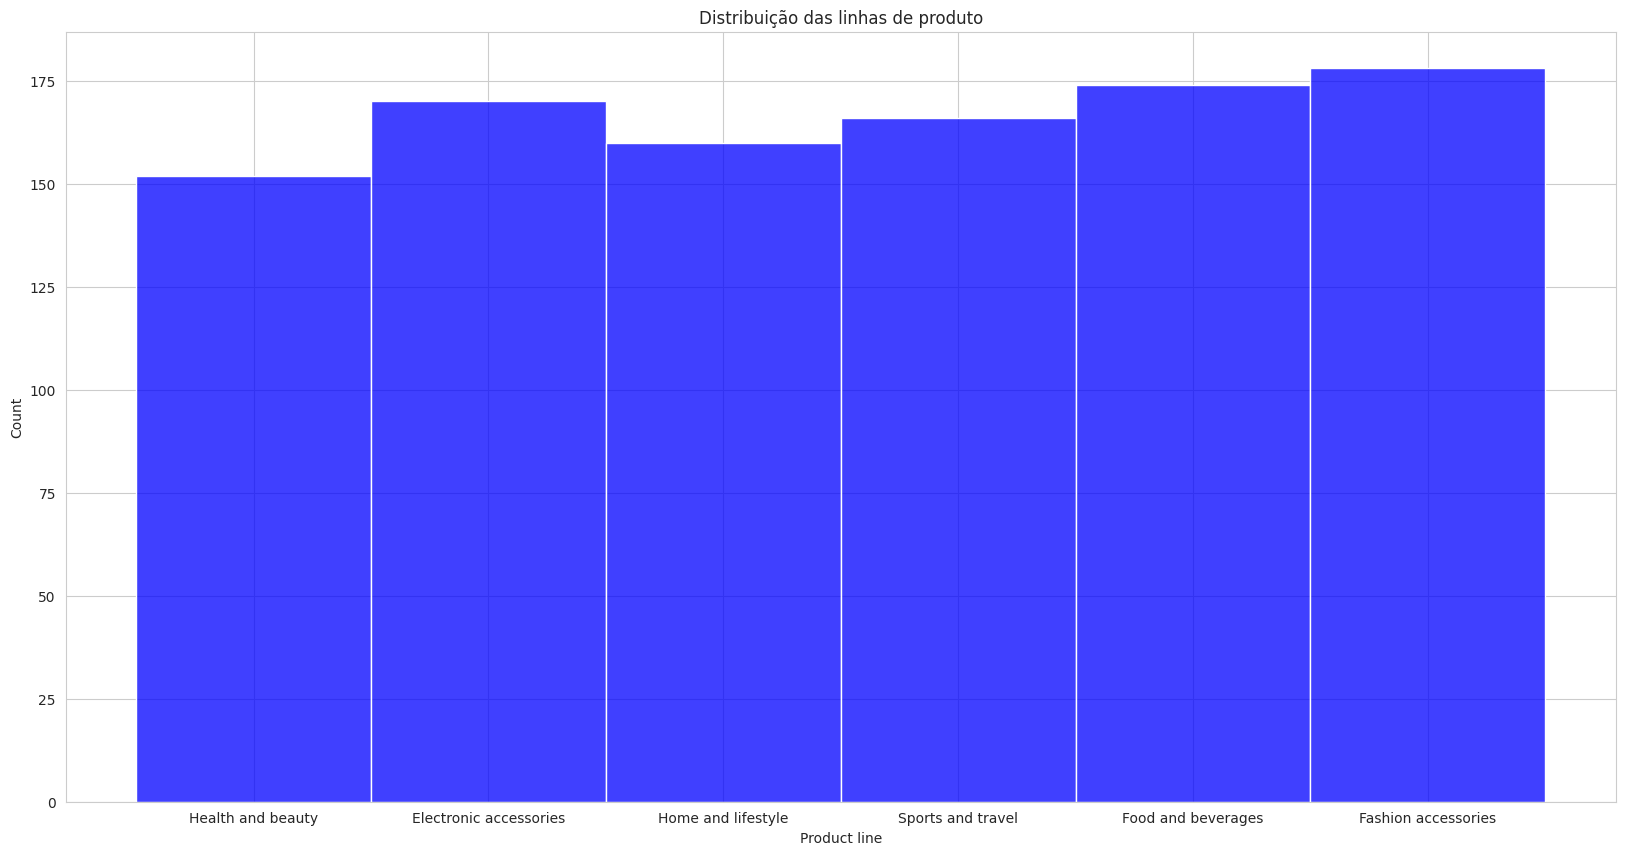

In [16]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Product line'], bins=30, kde=False, color='blue')
plt.title('Distribuição das linhas de produto')
plt.show()

In [17]:
qtd = df['Product line'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Product line', 'Frequencia']
qtd

,Product line,Frequencia
0,Fashion accessories,178
1,Food and beverages,174
2,Electronic accessories,170
3,Sports and travel,166
4,Home and lifestyle,160
5,Health and beauty,152


# Unit price 

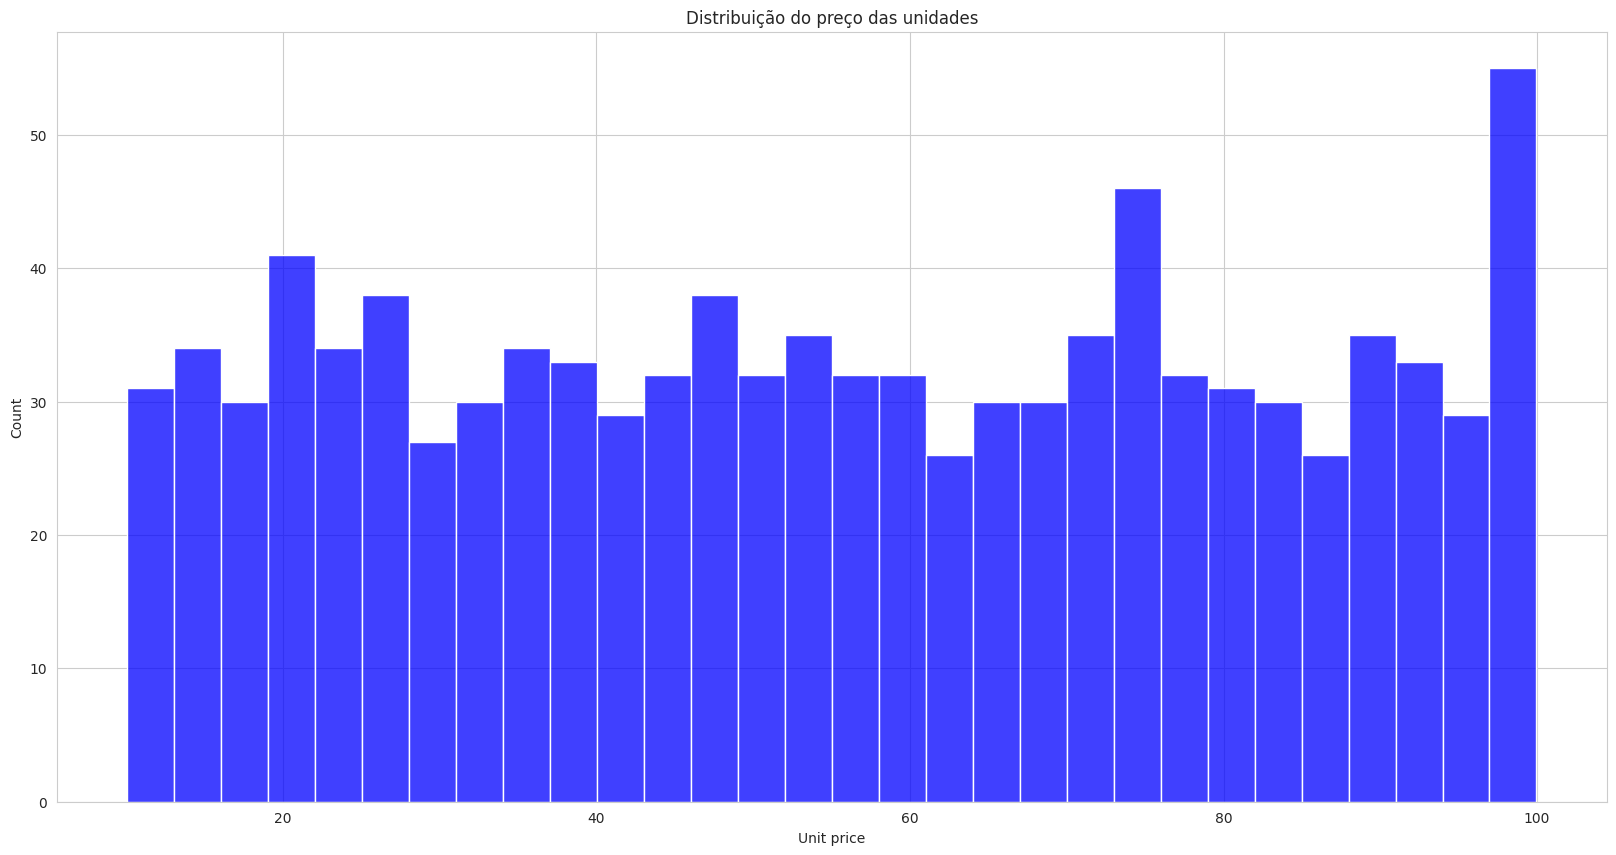

In [18]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Unit price'], bins=30, kde=False, color='blue')
plt.title('Distribuição do preço das unidades')
plt.show()

In [19]:
qtd = df['Unit price'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Unit price', 'Frequencia']
qtd

,Unit price,Frequencia
0,83.77,3
1,39.62,2
2,24.74,2
3,19.15,2
4,73.47,2
...,...,...
938,57.95,1
939,47.65,1
940,42.82,1
941,48.09,1


# Payment

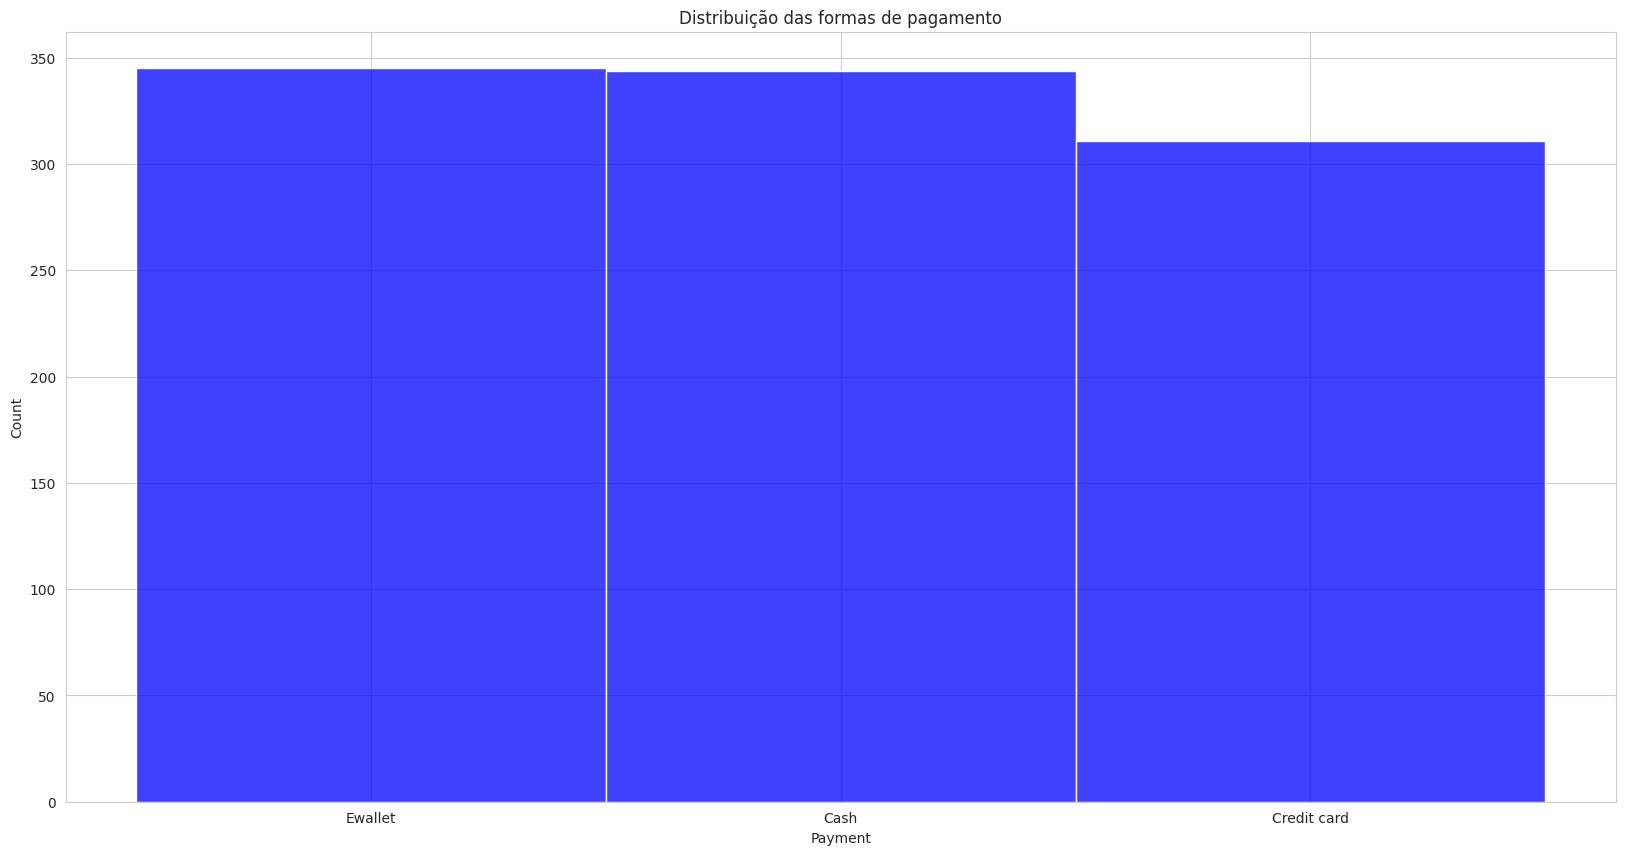

In [20]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Payment'], bins=30, kde=False, color='blue')
plt.title('Distribuição das formas de pagamento')
plt.show()

In [21]:
qtd = df['Payment'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Payment', 'Frequencia']
qtd

,Payment,Frequencia
0,Ewallet,345
1,Cash,344
2,Credit card,311


# Rating

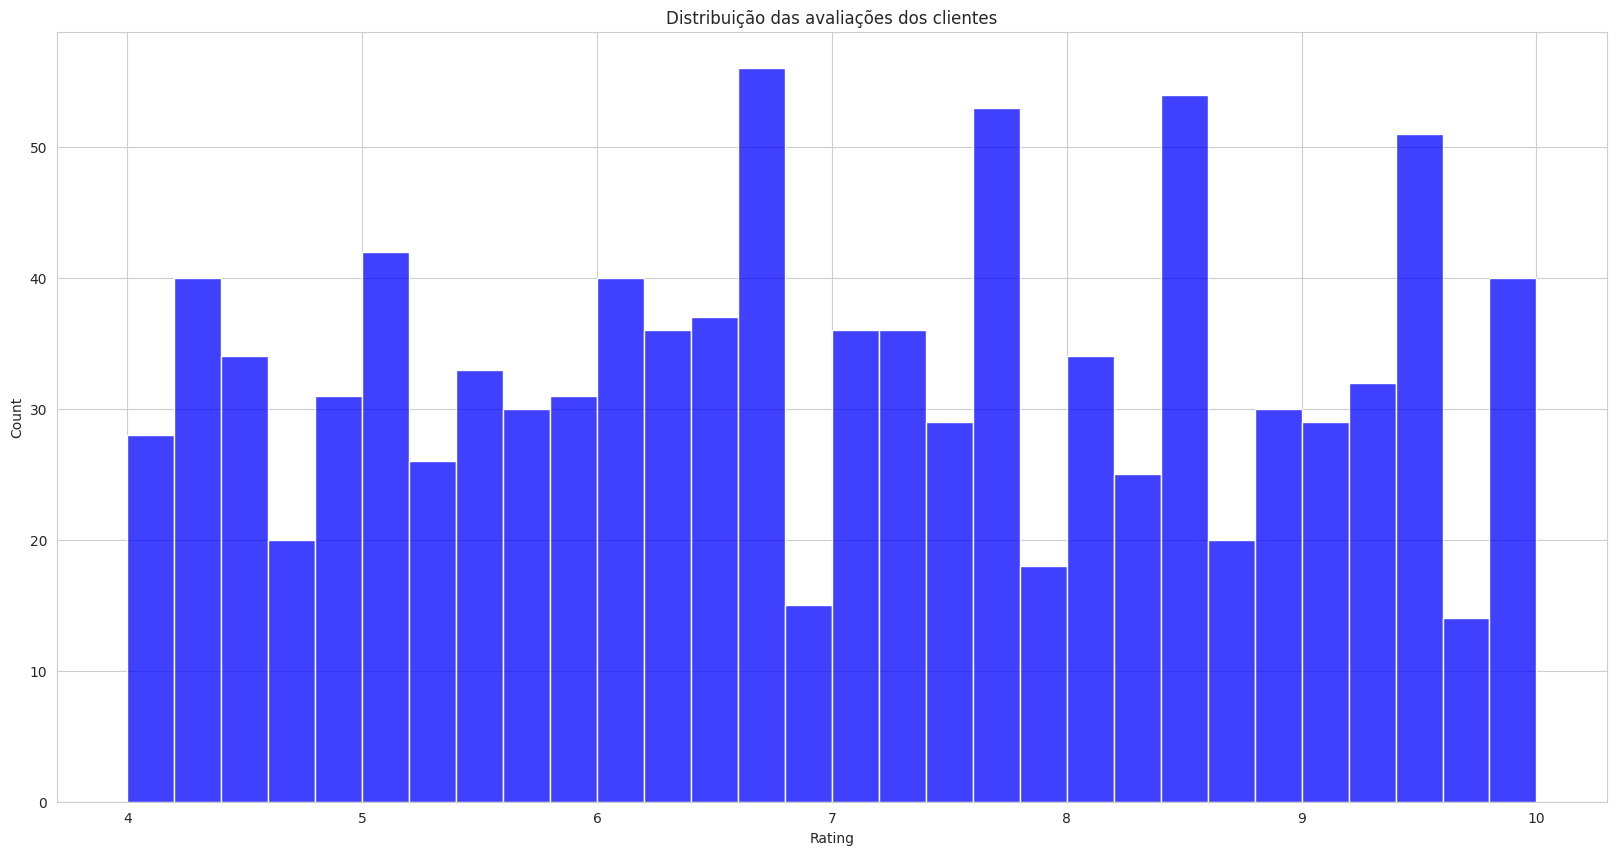

In [22]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Rating'], bins=30, kde=False, color='blue')
plt.title('Distribuição das avaliações dos clientes')
plt.show()

In [23]:
qtd = df['Rating'].value_counts().reset_index(name='Frequencia')
qtd.columns = ['Rating', 'Frequencia']
qtd

,Rating,Frequencia
0,6.0,26
1,6.6,24
2,4.2,22
3,9.5,22
4,6.5,21
...,...,...
56,4.0,11
57,5.3,11
58,8.3,11
59,4.6,8


# Verificando possíveis relações:

# Relações envolvendo Branch

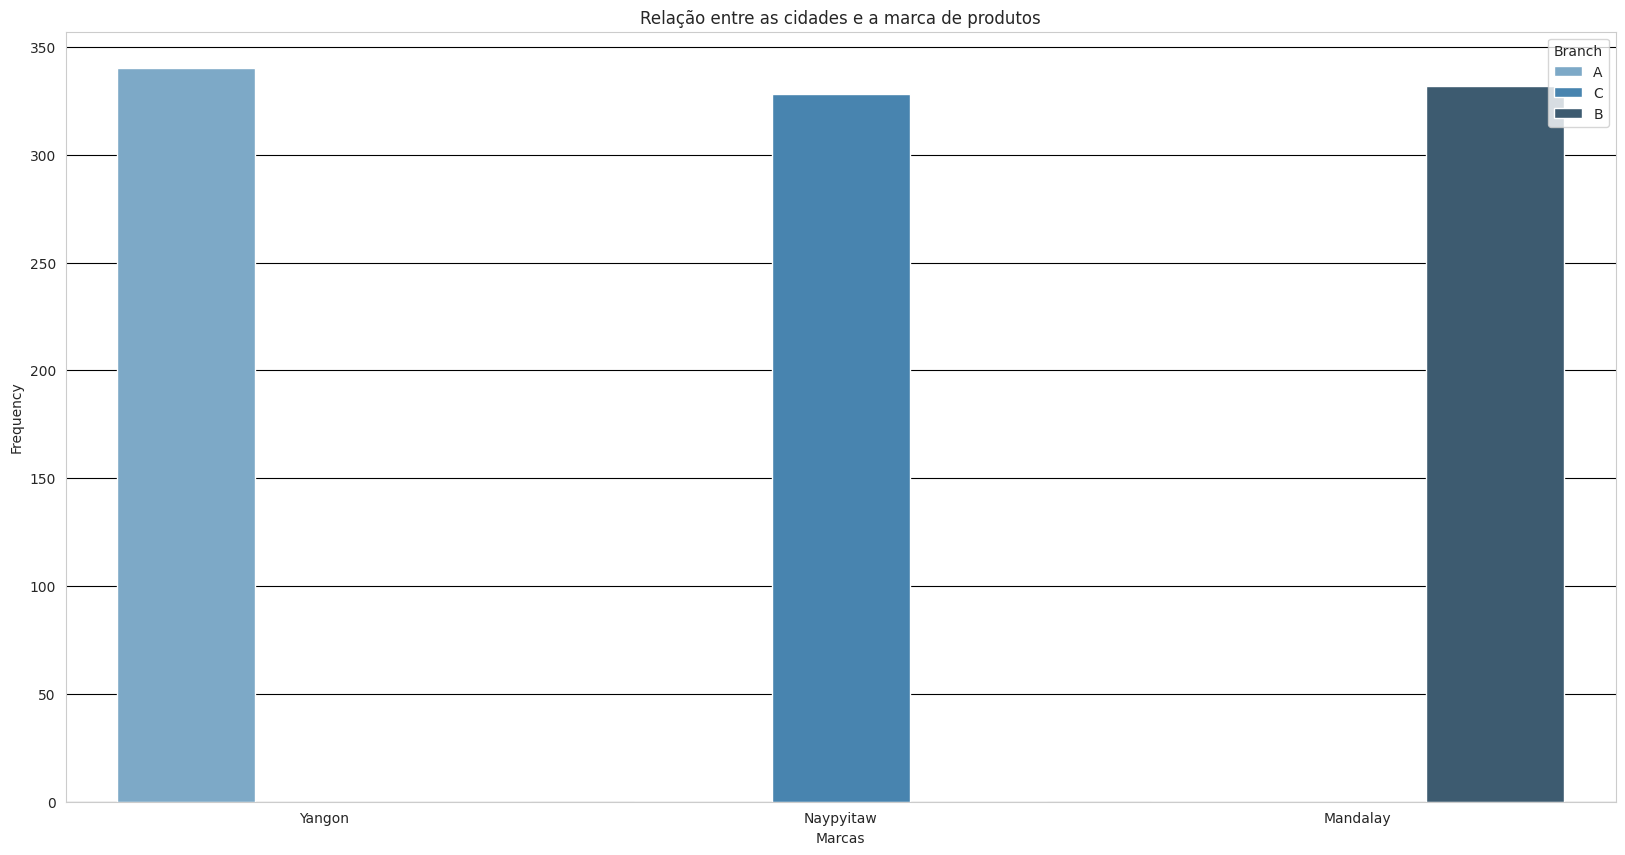

In [24]:
plt.figure(figsize=(20, 10))
sns.countplot(x='City', hue='Branch', data=df, palette='Blues_d')
plt.title('Relação entre as cidades e a marca de produtos')
plt.xlabel('Marcas')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')

In [25]:
contagem = df.groupby(['Branch', 'City']).size().reset_index(name='Frequency')
contagem

,Branch,City,Frequency
0,A,Yangon,340
1,B,Mandalay,332
2,C,Naypyitaw,328


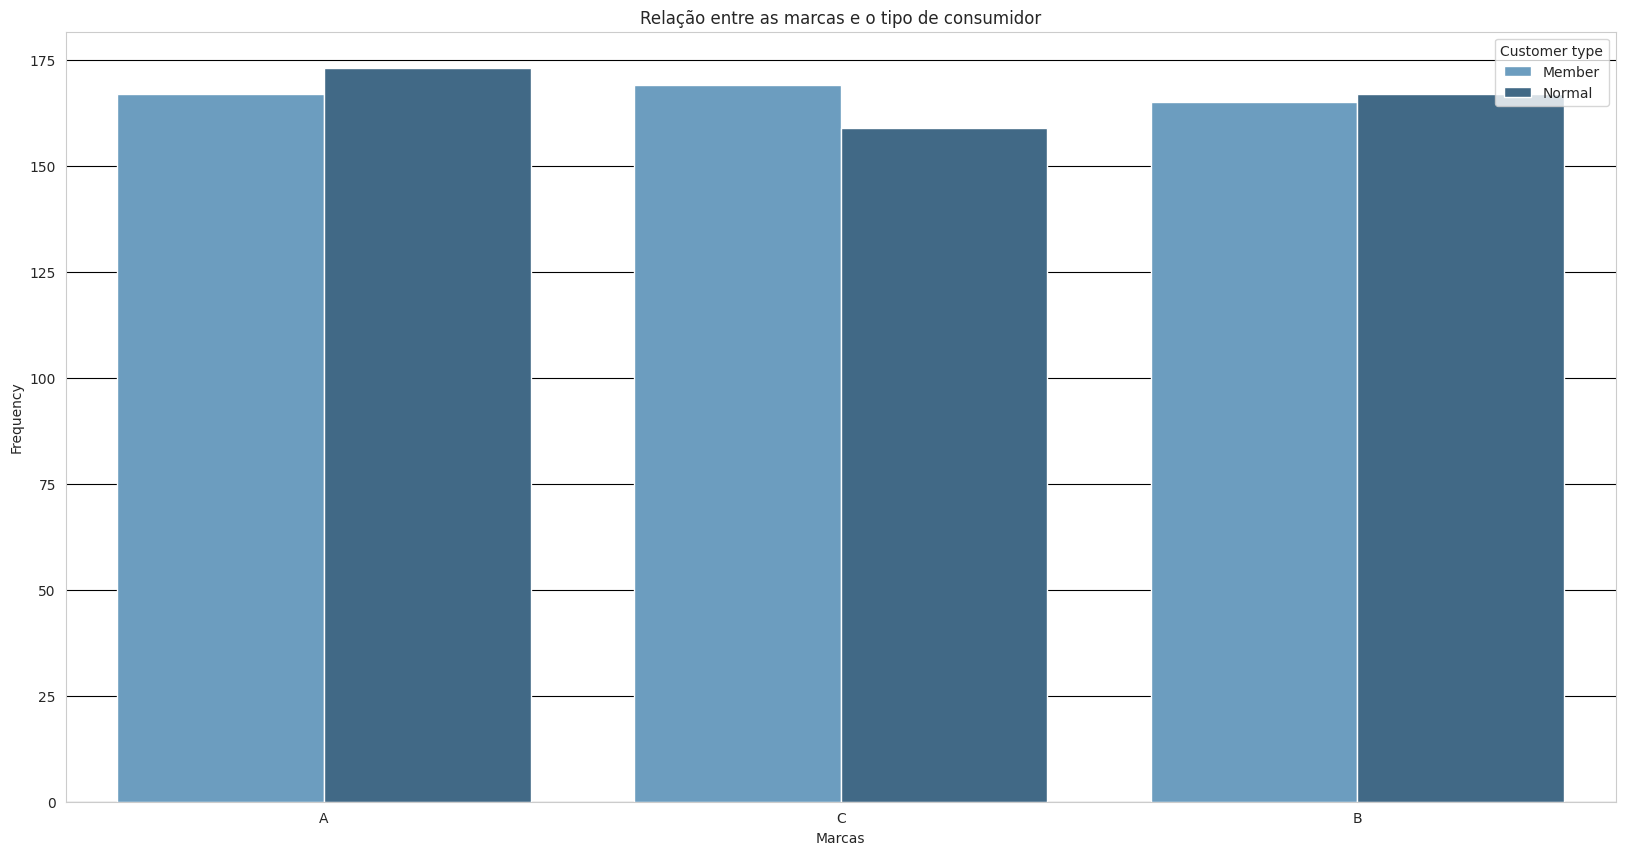

In [26]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Branch', hue='Customer type', data=df, palette='Blues_d')
plt.title('Relação entre as marcas e o tipo de consumidor')
plt.xlabel('Marcas')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')

In [27]:
contagem = df.groupby(['Branch', 'Customer type']).size().reset_index(name='Frequency')
contagem

,Branch,Customer type,Frequency
0,A,Member,167
1,A,Normal,173
2,B,Member,165
3,B,Normal,167
4,C,Member,169
5,C,Normal,159


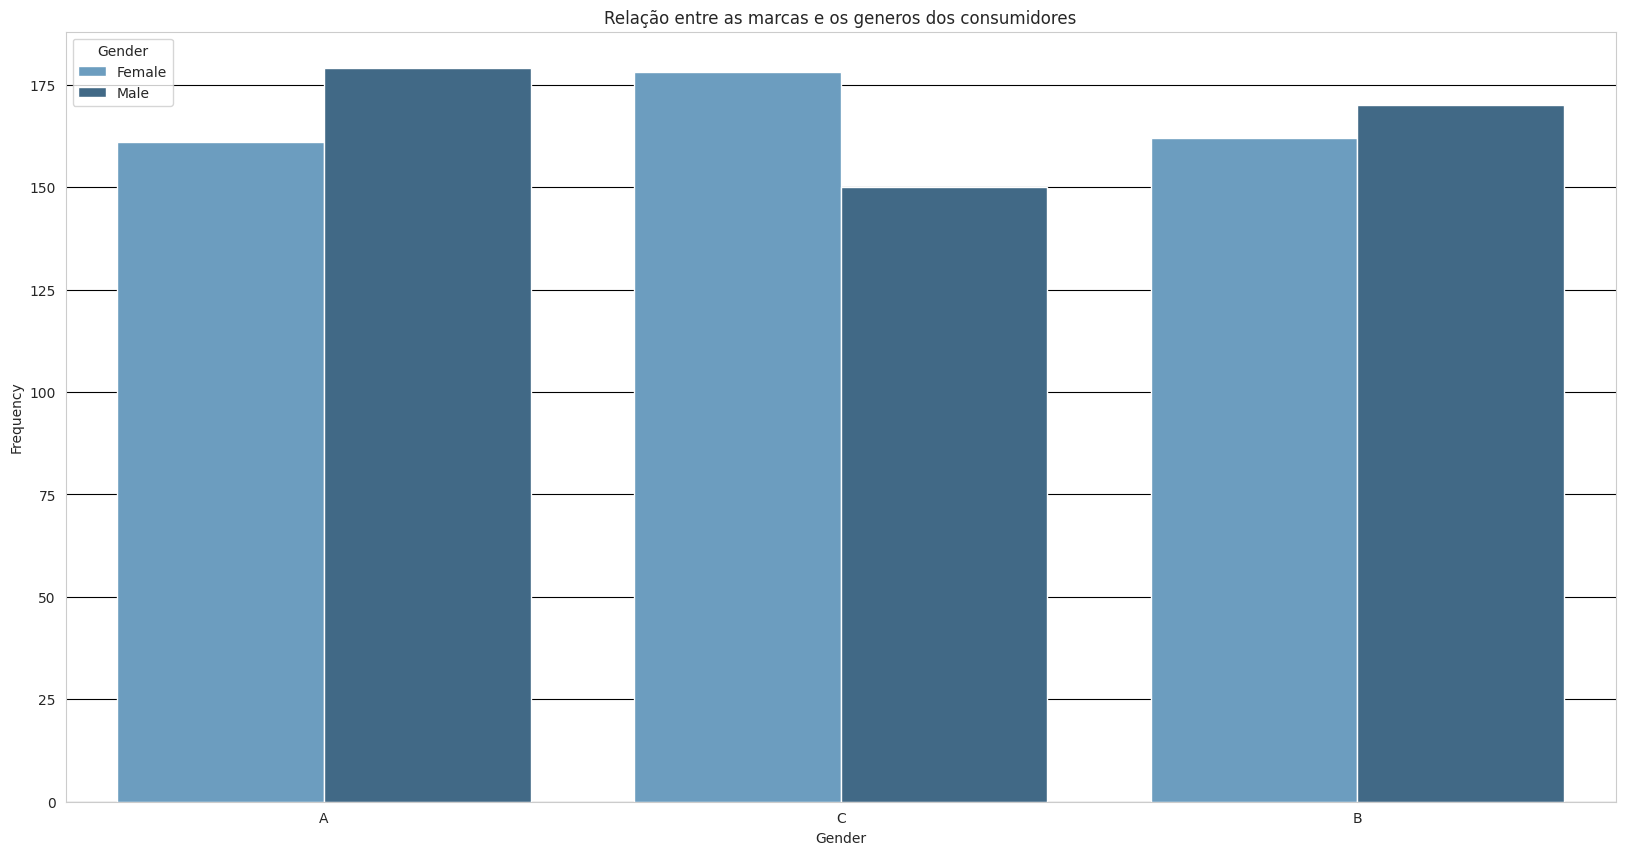

In [28]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Branch', hue='Gender', data=df, palette='Blues_d')
plt.title('Relação entre as marcas e os generos dos consumidores')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')

In [29]:
contagem = df.groupby(['Branch', 'Gender']).size().reset_index(name='Frequency')
contagem

,Branch,Gender,Frequency
0,A,Female,161
1,A,Male,179
2,B,Female,162
3,B,Male,170
4,C,Female,178
5,C,Male,150


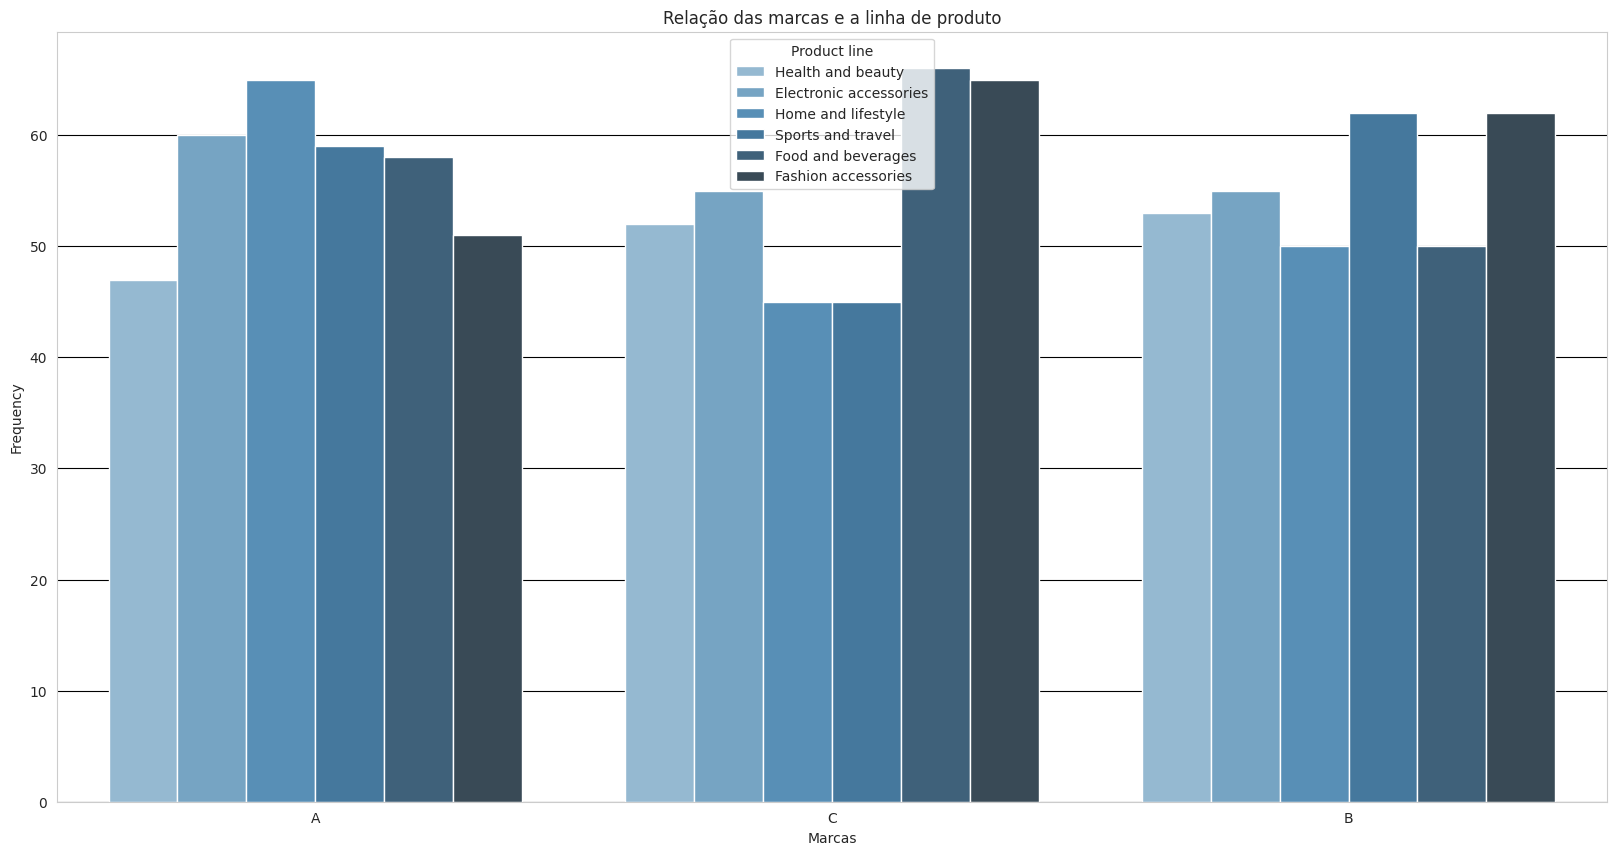

In [30]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Branch', hue='Product line', data=df, palette='Blues_d')
plt.title('Relação das marcas e a linha de produto')
plt.xlabel('Marcas')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')

In [31]:
contagem = df.groupby(['Branch', 'Product line']).size().reset_index(name='Frequency')
contagem

,Branch,Product line,Frequency
0,A,Electronic accessories,60
1,A,Fashion accessories,51
2,A,Food and beverages,58
3,A,Health and beauty,47
4,A,Home and lifestyle,65
5,A,Sports and travel,59
6,B,Electronic accessories,55
7,B,Fashion accessories,62
8,B,Food and beverages,50
9,B,Health and beauty,53


In [32]:
contagem = df.groupby(['Branch', 'Unit price']).size().reset_index(name='Frequency')
contagem

,Branch,Unit price,Frequency
0,A,10.08,1
1,A,10.13,1
2,A,10.56,1
3,A,10.69,1
4,A,10.96,1
...,...,...,...
974,C,99.42,1
975,C,99.69,1
976,C,99.79,1
977,C,99.82,2


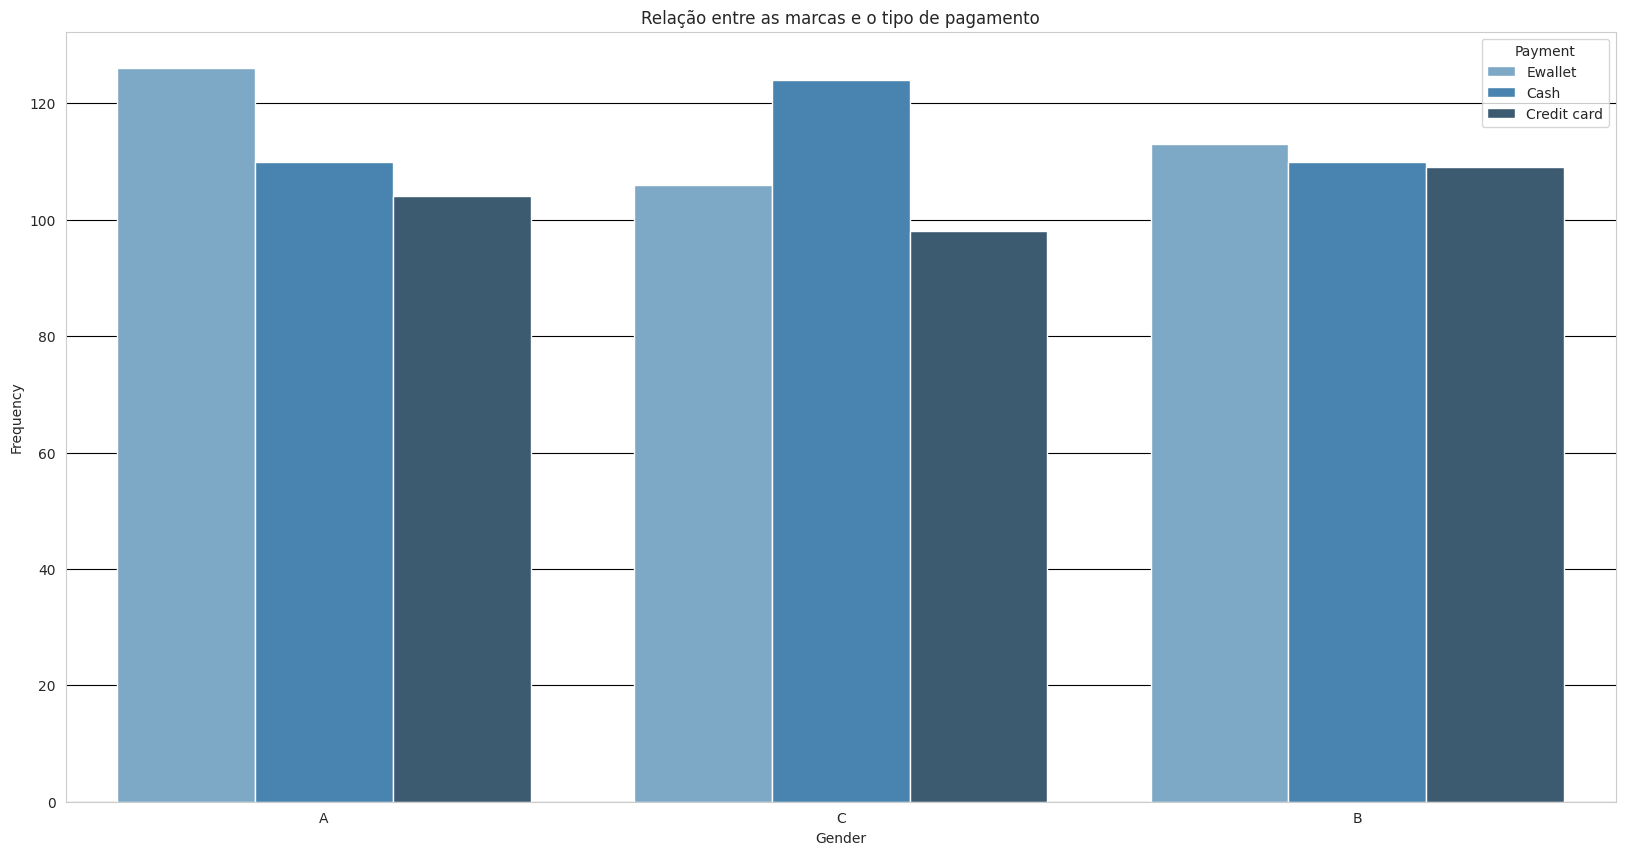

In [33]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Branch', hue='Payment', data=df, palette='Blues_d')
plt.title('Relação entre as marcas e o tipo de pagamento')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')

In [34]:
contagem = df.groupby(['Branch', 'Payment']).size().reset_index(name='Frequency')
contagem

,Branch,Payment,Frequency
0,A,Cash,110
1,A,Credit card,104
2,A,Ewallet,126
3,B,Cash,110
4,B,Credit card,109
5,B,Ewallet,113
6,C,Cash,124
7,C,Credit card,98
8,C,Ewallet,106


In [35]:
contagem = df.groupby(['Branch', 'Rating']).size().reset_index(name='Frequency')
contagem

,Branch,Rating,Frequency
0,A,4.0,2
1,A,4.1,5
2,A,4.2,11
3,A,4.3,6
4,A,4.4,6
...,...,...,...
178,C,9.6,5
179,C,9.7,5
180,C,9.8,6
181,C,9.9,4


# ML

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [37]:
# 1. Pré-processamento de Dados

# Convertendo variáveis categóricas em numéricas
label_encoder = LabelEncoder()
for coluna in df.select_dtypes(include=['object']).columns:
    df[coluna] = label_encoder.fit_transform(df[coluna])

In [38]:
# Separando variáveis independentes (X) e dependentes (y)
X = df.drop(columns=['Gender', 'Invoice ID', 'Tax 5%', 'Unit price', 'Date', 'Time', 'cogs', 'gross margin percentage', 'gross income']) 
y = df['Gender'] 

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Precisamos descobrir quais são as colunas que vamos analisar
# Treinando o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtendo a importância das características
importances = model.feature_importances_

# Criando um DataFrame para visualizar as importâncias
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibindo as 10 variáveis mais importantes
print(importance_df.head(10))

         Feature  Importance
5          Total    0.294507
7         Rating    0.261562
4       Quantity    0.151946
3   Product line    0.122766
6        Payment    0.070497
2  Customer type    0.039295
0         Branch    0.030826
1           City    0.028602


In [40]:
# Passo 2: Treinamento dos Modelos
# Modelos a serem testados:
models = {
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN (K-Vizinhos)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Redes Neurais": MLPClassifier(max_iter=1000, random_state=42)  # Rede Neural MLP (Multilayer Perceptron)
}


# Passo 3: Testando todos os modelos
for model_name, model in models.items():
    # Treinando o modelo
    model.fit(X_train, y_train)
    
    # Fazendo previsões no conjunto de teste
    y_pred = model.predict(X_test)
    
    # Calculando a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAcurácia do modelo {model_name}: {accuracy:.4f}")
    
    # Exibindo o relatório de classificação
    print(f"Relatório de Classificação para {model_name}:")
    print(classification_report(y_test, y_pred))


Acurácia do modelo Árvore de Decisão: 0.4850
Relatório de Classificação para Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.47      0.53      0.50        96
           1       0.51      0.44      0.47       104

    accuracy                           0.48       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.49      0.48      0.48       200


Acurácia do modelo Random Forest: 0.4900
Relatório de Classificação para Random Forest:
              precision    recall  f1-score   support

           0       0.47      0.59      0.53        96
           1       0.51      0.39      0.45       104

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200


Acurácia do modelo KNN (K-Vizinhos): 0.4950
Relatório de Classificação para KNN (K-Vizinhos):
              precision    recall  f1-score   support

          